# Your first deep neural network

# imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

Using TensorFlow backend.


# data

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 25s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [6]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

W0405 17:45:09.829958 140194801669952 deprecation_wrapper.py:119] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0405 17:45:09.839971 140194801669952 deprecation_wrapper.py:119] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0405 17:45:09.848747 140194801669952 deprecation_wrapper.py:119] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [14]:
3072 * 200 + 200

614600

In [15]:
200 * 150 + 150

30150

In [16]:
10 * 150 + 10

1510

# train

In [8]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

W0405 17:45:09.895508 140194801669952 deprecation_wrapper.py:119] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0405 17:45:09.900889 140194801669952 deprecation_wrapper.py:119] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

W0405 17:45:09.967915 140194801669952 deprecation.py:323] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0405 17:45:10.003067 140194801669952 deprecation_wrapper.py:119] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
50000/50000 [==============================] - 13s 251us/step - loss: 1.8445 - acc: 0.3366
Epoch 2/10
50000/50000 [==============================] - 12s 238us/step - loss: 1.6581 - acc: 0.4075
Epoch 3/10
50000/50000 [==============================] - 12s 237us/step - loss: 1.5852 - acc: 0.4357
Epoch 4/10
50000/50000 [==============================] - 11s 229us/step - loss: 1.5327 - acc: 0.4553
Epoch 5/10
50000/50000 [==============================] - 11s 226us/step - loss: 1.4955 - acc: 0.4681
Epoch 6/10
50000/50000 [==============================] - 12s 240us/step - loss: 1.4670 - acc: 0.4770
Epoch 7/10
50000/50000 [==============================] - 11s 219us/step - loss: 1.4373 - acc: 0.4899
Epoch 8/10
50000/50000 [==============================] - 11s 229us/step - loss: 1.4140 - acc: 0.4978
Epoch 9/10
50000/50000 [==============================] - 11s 229us/step - loss: 1.3908 - acc: 0.5066
Epoch 10/10
50000/50000 [==============================] - 11s 227us/step - loss: 

# analysis

In [10]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 66us/step


[1.4663965692520142, 0.4827]

In [11]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

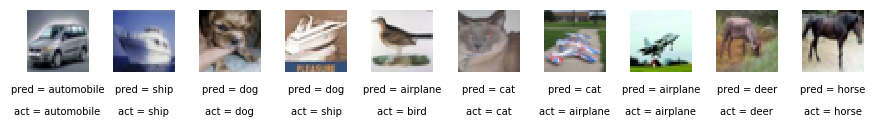

In [12]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
